Our Project is on Heart Disease Prediction. In this project, we predict whether a person has a heart disease or not based on the given features. We use different models to predict and conclude which model produces higher accuracy among them. We collected the dataset from Kaggle(https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) to train and test our models.

#1. Connecting to the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2.Importing the Dependencies and Data collection

In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns


# read dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_project/heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#3.Exploratory Data Analysis

We will use the following features to predict the target variable (heart disease or no heart disease).
1.	age = age in years
2.	sex
i.	0: female
ii.	1: male
3.	cp = chest pain type
i.	0: Typical angina
•	It is related to chest pain which decreases blood supply to the heart.
ii.	1: Atypical angina
•	chest pain not related to heart.
iii.	2: non-anginal pain
•	typically, esophageal spasms (non-heart related)
iv.	3: Asymptomatic
•	chest pain not showing signs of disease.
4.	trestbps = resting blood pressure (in mm Hg)
i.	above 130-140 is of concern.
5.	chol = serum cholesterol (represents the amount of total cholesterol in their blood) in mg/dl
i.	serum = LDL + HDL + .2 * triglycerides
ii.	above 200 is a cause for concern.
6.	fbs = fasting blood sugar(if fbs > 120 mg/dl then 1 = true else 0 = false)
i.	'>126' mg/dL signals diabetes
ii.	74-99 mg/dL is the normal range.
7.	restecg = resting electrocardiographic measurement.
a.	0: Normal.
b.	1: ST-T Wave abnormality
i.	can range from mild symptoms to severe problems.
ii.	signals non-normal heartbeat.
c.	2: Possible or definite left ventricular hypertrophy
i.	Enlarged heart's main pumping chamber.
8.	thalach = maximum heart rate achieved.
i.	Average heart rate: 60 to 100 bpm.
9.	exang = exercise induced angina
i.	1: yes, 0: no
ii.	Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
10.	oldpeak = ST depression induced by exercise relative to rest.
i.	looks at stress of heart during exercise.
ii.	unhealthy heart will stress more.
11.	slope = the slope of the peak exercise ST segment
i.	0: Upsloping
•	better heart rate with exercise (uncommon)
ii.	1: Flat sloping
•	minimal change (typical healthy heart)
iii.	2: Down sloping:
•	signs of unhealthy heart
12.	ca = number of major vessels (0-3) colored by fluoroscopy.
i.	colored vessel means the doctor can see the blood passing through.
ii.	the more blood movement the better (no clots)
13.	thal = thallium stress result -- A blood disorder called thalassemia.
i.	0: normal
ii.	1: fixed defect: the defect has been fixed now.
iii.	2: reversable defect: no proper blood movement when exercising.
14.	target = have disease or not (the predicted attribute)
i.	0: no heart disease (no)
ii.	1: heart disease (yes)

#3.1.Data Processing
#Basic checks

In [ ]:
#Renaming the column name
df.rename({'trestbps':'resting_blood_pressure','cp':'chest_pain_type','thalach':'max_heart_rate',
           'fbs':'fasting_blood_sugar','ca':'num_major_vessels','chol':'serum_cholesterol',
            'thal':'thallium_stress_result','target':'heart_disease'},inplace=True,axis=1)

In [ ]:
# total no. of rows and columns in the dataset
df.shape

(1025, 14)

In [ ]:
# checking if duplicates are present
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
df.duplicated().sum()
len(df)

1025

In [ ]:
# duplicate data is removed -- DataFrame with duplicates removed if inplace=True.
df.drop_duplicates(inplace=True)
len(df)

302

In [ ]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     302 non-null    int64  
 1   sex                     302 non-null    int64  
 2   chest_pain_type         302 non-null    int64  
 3   resting_blood_pressure  302 non-null    int64  
 4   serum_cholesterol       302 non-null    int64  
 5   fasting_blood_sugar     302 non-null    int64  
 6   restecg                 302 non-null    int64  
 7   max_heart_rate          302 non-null    int64  
 8   exang                   302 non-null    int64  
 9   oldpeak                 302 non-null    float64
 10  slope                   302 non-null    int64  
 11  num_major_vessels       302 non-null    int64  
 12  thallium_stress_result  302 non-null    int64  
 13  heart_disease           302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.

In [ ]:
#checking if any missing values present in the dataset
df.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
resting_blood_pressure    0
serum_cholesterol         0
fasting_blood_sugar       0
restecg                   0
max_heart_rate            0
exang                     0
oldpeak                   0
slope                     0
num_major_vessels         0
thallium_stress_result    0
heart_disease             0
dtype: int64

#STASTICAL MEASURE OF DATA

In [ ]:
# Getting the Descriptive statistics
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,num_major_vessels,thallium_stress_result,heart_disease
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#3.2. Data Visualization

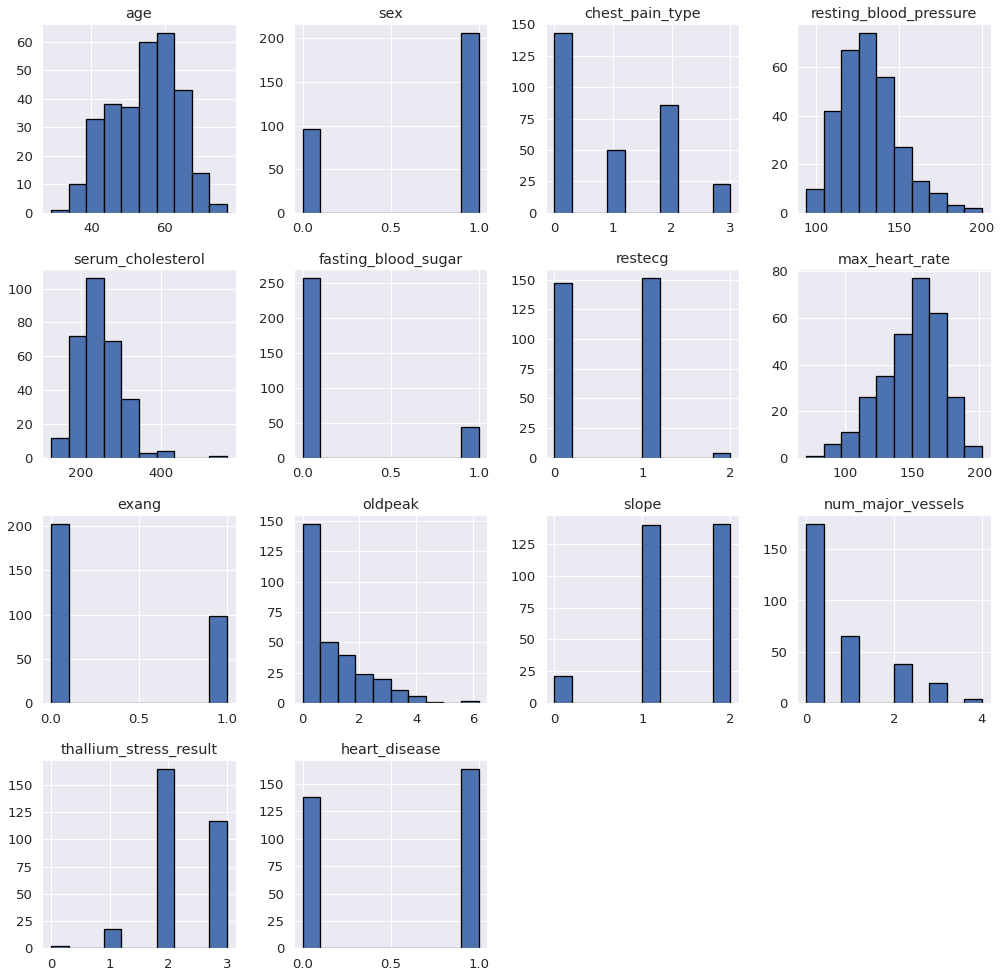

In [ ]:
#histogram of the DataFrame’s columns.
sns.set(font_scale=1.2)
df.hist(edgecolor='black', linewidth=1.3, figsize=(17, 17));


In [ ]:
# checking if the heart_disease variable is splitted in equal propotion
df['heart_disease'].value_counts()

1    164
0    138
Name: heart_disease, dtype: int64

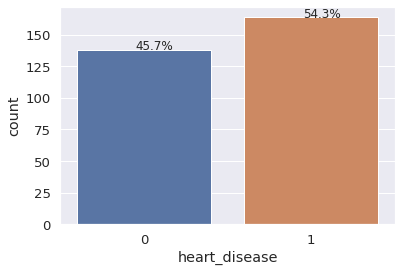

In [ ]:
#Count plot of the heart_disease
#The "target" field refers to the presence of heart disease in the patient.
# (0 = no disease, 1 = disease)
def getPercentage(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)


res = sns.countplot(data=df, x="heart_disease")
getPercentage(res,df.heart_disease)

In [ ]:
#(1 = male, 0 = female)
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

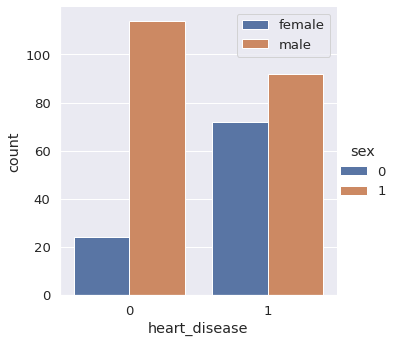

In [ ]:
sns.catplot(data=df, x="heart_disease", hue="sex", kind="count")
plt.legend(["female", "male"])

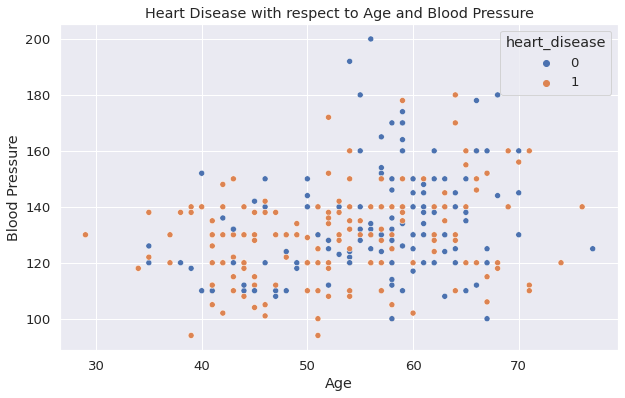

In [ ]:
# Age and Blood Pressure vs heart_disease
plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="resting_blood_pressure", hue="heart_disease",data=df)

plt.title("Heart Disease with respect to Age and Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure");

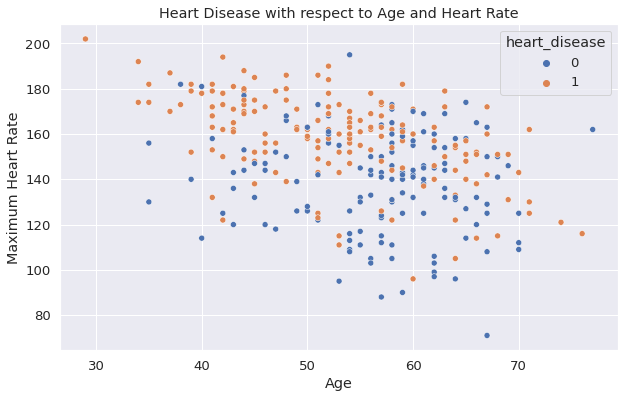

In [ ]:
# Age and Heart Rate vs heart_disease
plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="max_heart_rate", hue="heart_disease",data=df)

plt.title("Heart Disease with respect to Age and Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate");

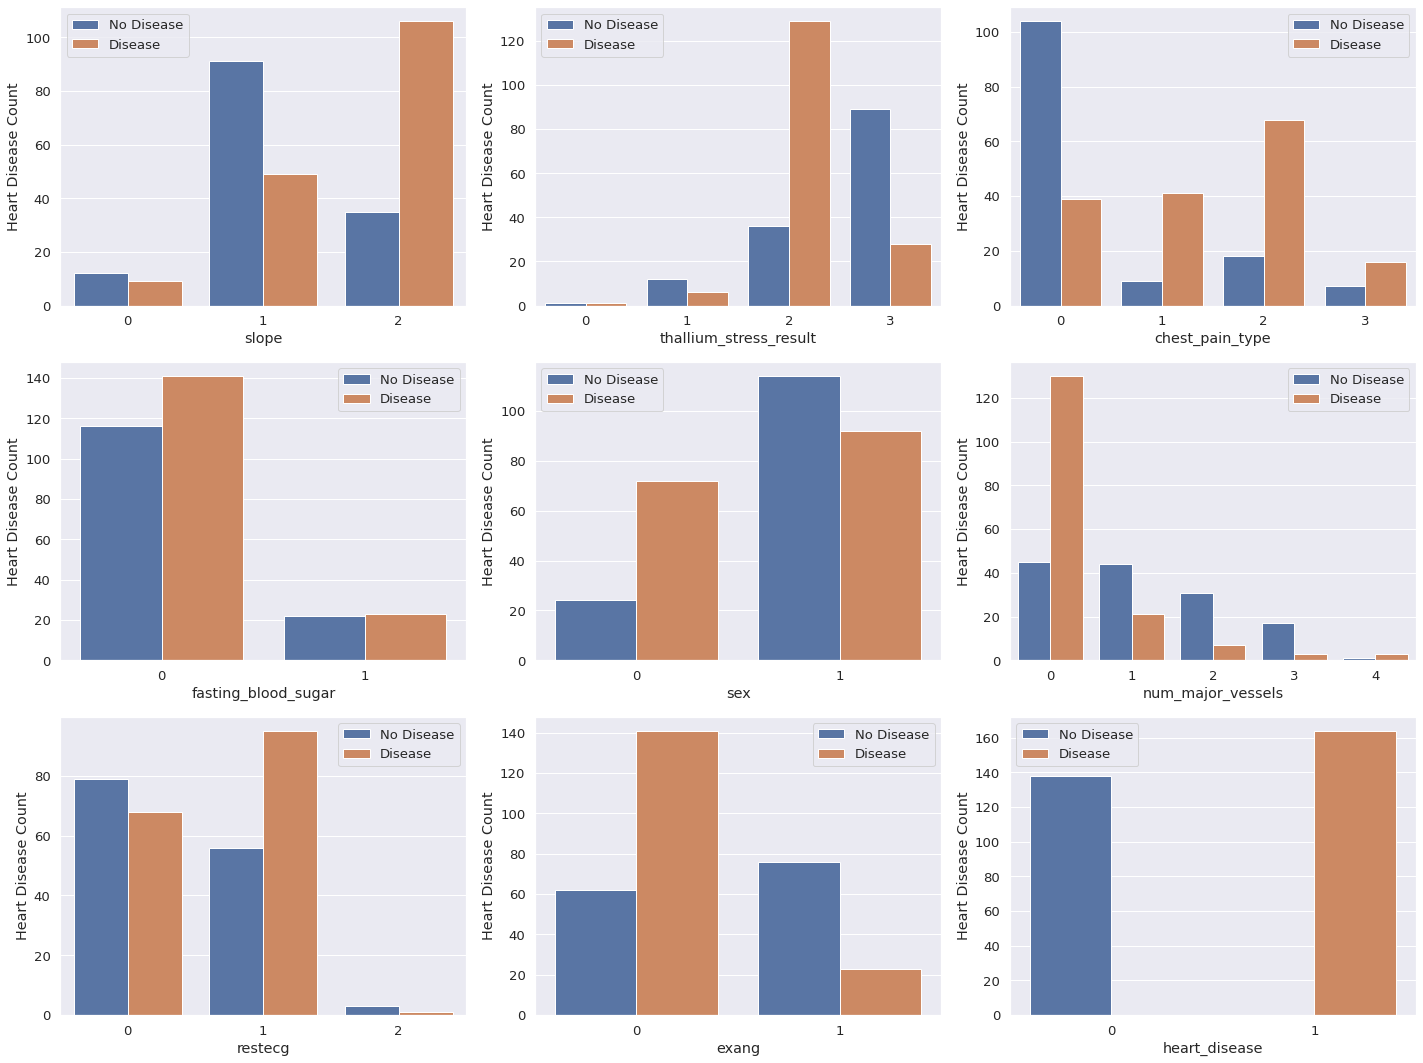

In [ ]:
#Categorical variables vs Target
categorical = df[['slope','thallium_stress_result','chest_pain_type','fasting_blood_sugar','sex','num_major_vessels','restecg','exang','heart_disease']]
# defining  canvas size
plt.figure(figsize=(20,15))
for count, column in enumerate(categorical, 1):
        ax = plt.subplot(3,3,count)
        sns.countplot(x=categorical[column],hue=df.heart_disease)
        plt.xlabel(column)
        plt.ylabel("Heart Disease Count")
        plt.legend(["No Disease", "Disease"])
plt.tight_layout()

#4.Feature Scaling


In [ ]:
#4.1.Convert categorical variable into dummy/indicator variables.
#df = pd.get_dummies(df, columns = ["chest_pain_type"])
#df.head()

#4.1.StandardScaler from sklearn is used to scale the dataset.

In [ ]:
# import the library
from sklearn.preprocessing import StandardScaler

# Creating object
standardScaler = StandardScaler()

# feature Scaling
columns_to_scale = ['age', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

#4.3.Checking correlation

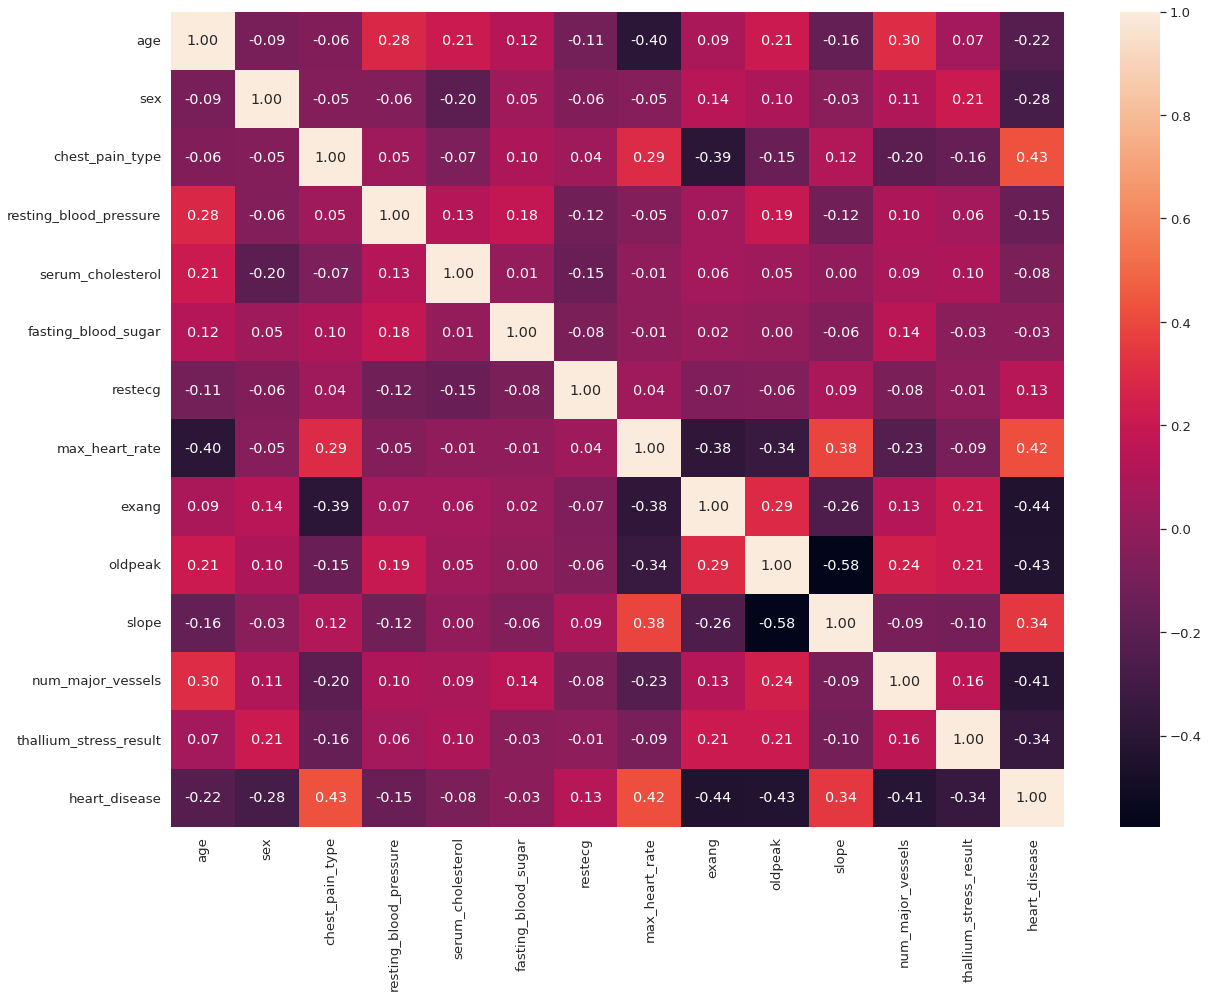

In [ ]:
#The matrix depicts the correlation between all the possible pairs of values in a table.
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt= ".2f");

#5.Models

Here we use different machine learning algorithms and predict which algorithm can predict accurately.


1.	Logistic Regression
2.	K-Nearest Neighbour
3.	Decision Tree
4.	Support Vector Machine


In [ ]:
#Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,recall_score,f1_score
from matplotlib.cm import rainbow


#Seperating into Features and label

In [ ]:
X = df.drop('heart_disease',axis=1)
y = df.heart_disease


In [ ]:
X.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,num_major_vessels,thallium_stress_result
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: heart_disease, dtype: int64

In [ ]:
y.value_counts()

1    164
0    138
Name: heart_disease, dtype: int64

#Splitting the data into training set and test set

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 ,random_state=20)

X_train.shape

(241, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
y_train.shape

(241,)

In [ ]:
y_test.shape

(61,)

#5.1.Logistic Regression

In [ ]:
logisticRegression = LogisticRegression()

#Fitting the training data
logisticRegression.fit(X_train,y_train)

# Prediction on test data
y_logReg_predict = logisticRegression.predict(X_test)

logReg_conf_matrix = confusion_matrix(y_test, y_logReg_predict)
print("confusion matrix")
print(logReg_conf_matrix)
print("=================================================\n")
print(classification_report(y_test,y_logReg_predict))

confusion matrix
[[23  4]
 [ 0 34]]

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.89      1.00      0.94        34

    accuracy                           0.93        61
   macro avg       0.95      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



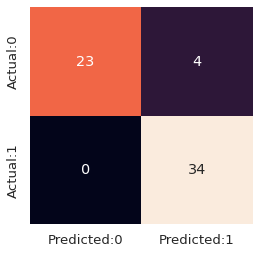

In [ ]:
conf_matrix = pd.DataFrame(data = logReg_conf_matrix,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (4, 4))
sns.heatmap(conf_matrix, annot = True, cbar=False)
plt.show()

In [ ]:
logReg_acc_score = accuracy_score(y_test, y_logReg_predict)
print("Logistic Regression Accuracy:",logReg_acc_score*100)

print("===============================================\n")

# prediction recall score
log_recall = recall_score(y_test, y_logReg_predict)
print("Logistic Regression recall:",log_recall*100)

Logistic Regression Accuracy: 93.44262295081968

Logistic Regression recall: 100.0


#5.2.Support Vector Machine

1. Trying with different kernels and choosing the best among them based on their score.
2. Using that best kernel, confusion matrix is plotted.

In [ ]:
svc_scores = []
kernels = ['poly', 'sigmoid', 'rbf']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

svc_scores

[0.7704918032786885, 0.8852459016393442, 0.819672131147541]

Text(0.5, 1.0, 'different kernels Scores')

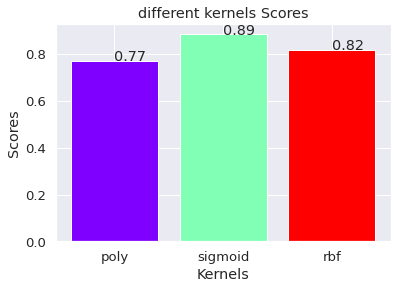

In [ ]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], '{0:.2f}'.format(svc_scores[i]))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('different kernels Scores')

In [ ]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
y_svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, y_svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("=================================================\n")
print(classification_report(y_test,y_svc_predicted))

confussion matrix
[[21  6]
 [ 1 33]]

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        27
           1       0.85      0.97      0.90        34

    accuracy                           0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



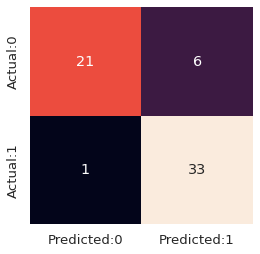

In [ ]:
conf_matrix = pd.DataFrame(data = svc_conf_matrix,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (4, 4))
sns.heatmap(conf_matrix, annot = True, cbar=False)
plt.show()

In [ ]:
svc_acc_score = accuracy_score(y_test, y_svc_predicted)
print("Support Vector Classifier Accuracy:",svc_acc_score*100)

print("===============================================\n")

svc_recall = recall_score(y_test, y_svc_predicted)
print("Support Vector Classifier recall:",svc_recall*100)

Support Vector Classifier Accuracy: 88.52459016393442

Support Vector Classifier recall: 97.05882352941177


#5.3.KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, y_knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("=================================================\n")
print(classification_report(y_test,y_knn_predicted))

confussion matrix
[[19  8]
 [ 1 33]]

              precision    recall  f1-score   support

           0       0.95      0.70      0.81        27
           1       0.80      0.97      0.88        34

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.84        61
weighted avg       0.87      0.85      0.85        61



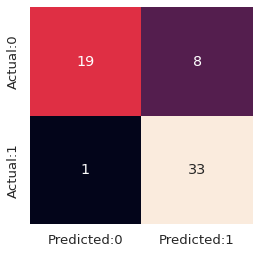

In [ ]:
conf_matrix = pd.DataFrame(data = knn_conf_matrix,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (4, 4))
sns.heatmap(conf_matrix, annot = True, cbar=False)
plt.show()

In [ ]:
knn_acc_score = accuracy_score(y_test, y_knn_predicted)
print("K-NeighborsClassifier Accuracy:",knn_acc_score*100,'\n')

print("===============================================\n")

knn_recall = recall_score(y_test, y_svc_predicted)
print("K-NeighborsClassifier recall:",knn_recall*100)


K-NeighborsClassifier Accuracy: 85.24590163934425 


K-NeighborsClassifier recall: 97.05882352941177


#5.4.Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(max_features = 7, max_depth = 9, random_state=10)
dt.fit(X_train, y_train)
y_dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, y_dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("=================================================\n")
print(classification_report(y_test,y_dt_predicted))

confussion matrix
[[23  4]
 [ 7 27]]

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



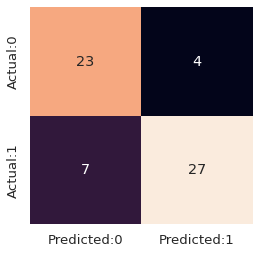

In [ ]:
conf_matrix = pd.DataFrame(data = dt_conf_matrix,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (4, 4))
sns.heatmap(conf_matrix, annot = True, cbar=False)
plt.show()

In [ ]:
dt_acc_score = accuracy_score(y_test, y_dt_predicted)
print("DecisionTreeClassifier Accuracy:",dt_acc_score*100,'\n')

print("===============================================\n")

dt_recall = recall_score(y_test, y_dt_predicted)
print("K-NeighborsClassifier recall:",dt_recall*100)

DecisionTreeClassifier Accuracy: 81.9672131147541 


K-NeighborsClassifier recall: 79.41176470588235
